# 다양한 크롤링 방법

## 1. Beautiful Soup 파싱(네이버)

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd


In [2]:
url = 'https://finance.naver.com/sise/sise_deal_rank.nhn'

req = requests.get(url)
soup = BeautifulSoup(req.content, 'html.parser')
table_doc = soup.find('table', {'class':'type_r1'}) 
# finde : 최상단 자료만 가져옴 vs findAll : 전체 자료를 가져옴

table_doc

<table cellpadding="0" cellspacing="0" class="type_r1" summary="기관 순매수 상위7 리스트">
<caption>기관 순매수 상위7</caption>
<col width="11%"/><col width="*"/><col width="30%"/><col width="13%"/>
<tr>
<td align="right" class="tr"><img alt="01" height="11" src="https://ssl.pstatic.net/imgstock/images5/ico_n01.gif" width="11"/></td>
<td><a class="company" href="/item/main.nhn?code=009830" onclick="clickcr(this, 'rdr.list', '009830', '1', event)">한화케미칼</a></td>
<td class="number">21,450</td>
<td class="tc">
<img alt="up" class="updown" height="6" src="https://ssl.pstatic.net/imgstock/images/images4/ico_up.gif" width="7"/>
</td>
</tr>
<tr>
<td align="right" class="tr"><img alt="01" height="11" src="https://ssl.pstatic.net/imgstock/images5/ico_n02.gif" width="11"/></td>
<td><a class="company" href="/item/main.nhn?code=122630" onclick="clickcr(this, 'rdr.list', '122630', '2', event)">KODEX 레버리지</a></td>
<td class="number">11,665</td>
<td class="tc">
<img alt="down" class="updown" height="6" src="https://s

## 2. Yahoo finance 활용

https://pypi.org/project/fix-yahoo-finance/

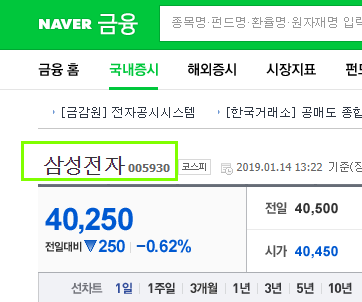

tickers(시세) 파라미터에, 기업 번호를 쓴다(삼성전자 - 005930

In [3]:
from pandas_datareader import data
import fix_yahoo_finance as yf
yf.pdr_override()

start_data = '2002-01-01'
end_date = '2018-10-29'
tickers = ['005300.KS']
lotte = data.get_data_yahoo(tickers, start_data, end_date)


[*********************100%***********************]  1 of 1 downloaded


In [4]:
lotte.head(1)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-01-02,491000.0,500000.0,490000.0,500000.0,466150.46875,7800


# 감성점수 구하기

    1.뉴스 크롤링 
    -- 기사를 저장할 폴더와 형태소 폴더를 생성
    -- 뉴스 개수 파악
    -- 크롤링 하면서 1차 전처리 
    -- 1차 전처리 된 파일은 pickle 형태로 저장
    
    2.뉴스 전처리
    -- pickle 파일 불러오기
    -- 저장된 뉴스의 형태소를 konlpy를 이용해 형태소 분해를 진행

## 1. 뉴스 크롤링

In [22]:
import re
import os
import time
import pickle
import requests
from bs4 import BeautifulSoup


사용할 url

In [23]:
url = 'http://find.mk.co.kr/new/search.php?pageNum=1&cat=&cat1=&media_eco=&pageSize=10&sub=all&dispFlag=OFF&page=news&s_kwd=%B7%D4%B5%A5%C4%A5%BC%BA&s_page=news&go_page=&ord=2&ord1=1&ord2=0&s_keyword=%B7%D4%B5%A5%C4%A5%BC%BA&s_i_keyword=%B7%D4%B5%A5%C4%A5%BC%BA&s_author=&y1=1991&m1=01&d1=01&y2=2019&m2=01&d2=14&ord=1&area=ttbd'

url request

In [24]:
req = requests.get(url)
soup = BeautifulSoup(req.content, 'html.parser')

### [1-1] 뉴스 개수 파악

In [25]:
news_count = re.findall('\d+', soup.find('div', {'sub_top'}).text)[:-2]

뉴스 개수를 계산하여 page number 변수를 선언

In [26]:
news_count = int(news_count[0] + news_count[1])
page_number = 0

if news_count%20 != 0:
    page_number = int(news_count/20) + 1
else:
    page_number = int(news_count/20)
    
page_number

1325

### [1-2] pickle 파일로 저장

make parse

In [29]:
time.sleep(5)

news_index = 0

for date_page in range(1,3):
    print('page number:', date_page, '/', page_number )
#     url = 'http://find.mk.co.kr/new/search.php?pageNum='+'str(date_page)'+'&cat=&cat1=&media_eco=&pageSize=10&sub=all&dispFlag=OFF&page=news&s_kwd=%B7%D4%B4%EB%C4%A5%BC%BA&s_page=news&go_page=&ord=2&ord1=1&ord2=0&s_keyword=%B7%D4%B5%A5%C4%A5%BC%BA&s_i_keyword=%B7%D4%B4%EB%C4%A5%BC%BA&s_author=&y1=1991&m1=01&d1=01&y2=2018&m2=12&d2=26&ord=2&area=ttbd'
    #url = 'http://find.mk.co.kr/new/search.php?pageNum='+str(date_page)+'&cat=&cat1=&media_eco=&pageSize=10&sub=all&dispFlag=OFF&page=news&s_kwd=%B7%D4%B4%EB%C4%A5%BC%BA&s_page=news&go_page=&ord=2&ord1=1&ord2=0&s_keyword=%B7%D4%B5%A5%C4%A5%BC%BA&s_i_keyword=%B7%D4%B4%EB%C4%A5%BC%BA&s_author=&y1=1991&m1=01&d1=01&y2=2018&m2=12&d2=26&ord=2&area=ttbd'
    url ='http://find.mk.co.kr/new/search.php?pageNum='+str(date_page)+'&cat=&cat1=&media_eco=&pageSize=10&sub=all&dispFlag=OFF&page=news&s_kwd=%B7%D4%B5%A5%C4%A5%BC%BA&s_page=news&go_page=&ord=2&ord1=1&ord2=0&s_keyword=%B7%D4%B5%A5%C4%A5%BC%BA&s_i_keyword=%B7%D4%B5%A5%C4%A5%BC%BA&s_author=&y1=1991&m1=01&d1=01&y2=2019&m2=01&d2=14&ord=1&area=ttbd'
    group = '롯데칠성'
    
    req = requests.get(url)
    soup = BeautifulSoup(req.content, 'html.parser')
    news_list = soup.find_all('div', {'class' : 'sub_list'})
    news_ = {}
    
    #make news link
    for i in news_list:
        date_news_list = re.findall('\d+', i.find('span', {'class':'art_time'}).text)
        
        #index date time preprocessing
        date_index = str(date_news_list[0])+'.'+str(date_news_list[1]) +'.'+str(date_news_list[2])+''+str(date_news_list[3])+':'+str(date_news_list[4])+':'+str(date_news_list[5])
        
        #total data make dict type
        news_[date_index] = {'date': date_index, 
                             'link':i.a['href'], 
                             'title':i.find('span', {'class': 'art_tit'}).text, 
                             'group' : group}
        
        news_index += 1
        
        
    for nl in list(news_.keys())[:]:
        link_url = news_[nl]['link']
        link_req = requests.get(link_url)
        
        time.sleep(5)
        
        if link_req.status_code ==200:
            link_soup = BeautifulSoup(link_req.content, 'html.parser')
            try:
                script = link_soup.find('div', {'class':'art_txt'}).text
            except Exception as e:
                print(e)
                pass
            news_[nl].update({'script':script})
            
    with open('./매일경제/'+group+'/news_'+str(date_page)+'.pickle','wb') as f:
        pickle.dump(news_, f, pickle.HIGHEST_PROTOCOL)
print('done')
                

page number: 1 / 1325
page number: 2 / 1325
done


## 2. 뉴스 전처리

### [2-1] 1차 전처리 파일 불러오기 + Konlpy 형태소 분해

In [30]:
import os
import math
import pickle
import pandas as pd
from datetime import datetime
from collections import Counter
from konlpy.tag import Twitter; tw=Twitter()

#data load
pic_list = []
for (path, dir_, files) in os.walk('./매일경제/롯데칠성'):
    if files !=[]:
        for pic in files:
            pic_list.append('./매일경제/롯데칠성/'+pic[:])
news_ = {}
for i in pic_list[:]:
    #load
    with open(i, 'rb') as f:
        news_.update(pickle.load(f))
        
        

C:\Users\user\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [31]:
news_

{'2019.01.1411:36:36': {'date': '2019.01.1411:36:36',
  'link': 'http://news.mk.co.kr/newsRead.php?year=2019&no=27114',
  'title': '[부고]  이원표 롯데칠성음료 커뮤니케이션 부문장 빙모상',
  'group': '롯데칠성',
  'script': '정복임씨 별세, 이수빈·경희·종호(해양수산부 과장)·종옥씨 모친상, 이원표(롯데칠성음료 커뮤니케이션부문장)씨 빙모상, 이윤영(농림축산식품부 근무)씨 시모상=13일, 강남성모병원 장례식장 14호실, 발인 16일 오전 7시- 특종과 이슈에 강하다! 1등 매체 [더팩트]- 새로운 주소`TF.co.kr`를 기억해주세요![http://www.TF.co.kr]- 걸어 다니는 뉴스 [모바일웹] [안드로이드] [아이폰]- [단독/특종] [기사제보] [페이스북] [트위터]\n\nwindow.jQuery || document.write("<script src=\'//common.mk.co.kr/common/include/mklib/jquery.js\'>")\n\n'},
 '2019.01.1008:26:01': {'date': '2019.01.1008:26:01',
  'link': 'http://news.mk.co.kr/newsRead.php?year=2019&no=19557',
  'title': '전일자 증권사 투자의견(유지/신규)',
  'group': '롯데칠성',
  'script': '\n제목 : 전일자 증권사 투자의견(유지/신규)\n종목명증권사투자의견목표주가\n게임빌(063080)케이프투자\nHold60,000\n금호석유(011780)키움\nBUY130,000\n기아차(000270)하나금융투자\nBUY40,000\n녹십자(006280)삼성\nBUY160,000\n농심(004370)하이투자\nBUY310,000\n대림산업(000210)유안타\nBUY110,000\n대상(001680)하나금융투자\nBUY33,000\n대우

In [34]:
index_date

['2019-01-01',
 '2019-01-02',
 '2019-01-03',
 '2019-01-04',
 '2019-01-05',
 '2019-01-06',
 '2019-01-07',
 '2019-01-08',
 '2019-01-09',
 '2019-01-10',
 '2019-01-11',
 '2019-01-12',
 '2019-01-13',
 '2019-01-14']

In [36]:
#make index
index_date =[i.strftime('%Y-%m-%d') for i in pd.date_range('20181101', '20190114')]
news_each_day = {} # make news each day
for idx in index_date[:]:
    news_day = ''
    for find_date in news_.keys():
        try:
            if news_[find_date]['date'][:10].replace('.', '-') == idx:
                news_day += news_[find_date]['script']
        except Exception as e:
            print(e)
            pass
    news_each_day[idx] = {'date':idx, 'script':news_day}
token_ = {}#sum news by each day

for i in list(news_each_day.keys())[:]:
    if news_each_day[i]['script'] != '':
        token_[i] = {'date':datetime.strptime(news_each_day[i]['date'], '%Y-%m-%d'), 'nouns' : tw.nouns(news_each_day[i]['script'])}
        
#save news
group = '형태소'
with open('./매일경제/'+group+'/news_.pickle', 'wb') as f:
    pickle.dump(token_, f, pickle.HIGHEST_PROTOCOL)

In [37]:
token_

{'2018-12-14': {'date': datetime.datetime(2018, 12, 14, 0, 0),
  'nouns': ['서울',
   '잠실',
   '롯데',
   '호텔',
   '월드',
   '제',
   '롯데',
   '와우',
   '포럼',
   '황',
   '규',
   '롯데',
   '지주',
   '부회장',
   '왼쪽',
   '이',
   '진달래',
   '롯데',
   '칠성',
   '음료',
   '상무',
   '심',
   '향',
   '롯데',
   '베르살',
   '리스',
   '팀',
   '유',
   '혜종',
   '롯데',
   '월드',
   '팀',
   '최은영',
   '롯데',
   '하이마트',
   '지점',
   '김은혜',
   '롯데',
   '제과',
   '셰프',
   '왼쪽',
   '기념',
   '촬영',
   '사진',
   '제공',
   '롯데',
   '지주',
   '제조업',
   '여성',
   '공채',
   '만큼',
   '행동',
   '하나',
   '하나',
   '선례',
   '수',
   '생각',
   '사명',
   '의식',
   '일',
   '롯데',
   '그룹',
   '여성',
   '공채',
   '호',
   '임원',
   '진달래',
   '롯데',
   '칠성',
   '음료',
   '품질',
   '보증',
   '팀',
   '상무',
   '은',
   '서울',
   '잠실',
   '롯데',
   '호텔',
   '월드',
   '여성',
   '리더십',
   '포럼',
   '롯데',
   '와우',
   '포럼',
   '품질',
   '관리',
   '전문',
   '인자',
   '로서',
   '실력',
   '경험',
   '날',
   '행사',
   '진',
   '상무',
   '롯데',
   '월드',
   '페스티벌',
   '컨텐츠',
   '기획',
   '팀',
   '유

### [2-2] 감성 사전 로드

In [61]:
sentiment_dict_df = pd.read_csv('polarity.csv', encoding='utf-8')
sentiment_dict_df.head()

,ngram,freq,COMP,NEG,NEUT,None,POS,max.value,max.prop
0,가*/JKS,1,0.0,0.0,0.0,0.0,1.0,POS,1.0
1,가*/JKS;있/VV,1,0.0,0.0,0.0,0.0,1.0,POS,1.0
2,가*/JKS;있/VV;었/EP,1,0.0,0.0,0.0,0.0,1.0,POS,1.0
3,가*/VV,3,0.0,0.0,0.0,0.0,1.0,POS,1.0
4,가*/VV;ㄴ다*/EF,1,0.0,0.0,0.0,0.0,1.0,POS,1.0


In [63]:
sentiment_dict_df['ngram'].head()

0              가*/JKS
1         가*/JKS;있/VV
2    가*/JKS;있/VV;었/EP
3               가*/VV
4        가*/VV;ㄴ다*/EF
Name: ngram, dtype: object

In [97]:
# def dictionary_prepro(sentiment_dict_df):
#     Score_df = pd.DataFrame()
#     for sent_df_row in range(len(sentiment_dict_df)):
# #         sentiment_dict_df['ngram']['sent_df_row'].split(';')   잘못 쓴 코드

#         for find_noun_row in range(len(sentiment_dict_df['ngram']['sent_df_row'].split(';'))):
#             if sentiment_dict_df['ngram']['sent_df_row'].split(';')[find_noun_row].split('/')[-1] =='NNG':
#                 #ngram 값이 NNG일 경우 Score_df 추가
#                 Score_df = pd.concat([Score_df, sentiment_dict_df.iloc[sent_df_row, :]], axis=1)
#                 #형용사가 없는 row일 경우
#             if sentiment_dict_df['ngram'][sent_df_row].split('/')[-1]=='NNG':
#                 Score_df=pd.concat([Score_df, sentiment_dict_df.iloc[sent_df_row, :]], axis=1)
#             Score_df = Score_df.T.reset_index()
#             return Score_df
        
        
# Score_df = dictionary_prepro(sentiment_dict_df)
# remove_same =[]
# for i in range(len(Score_df['ngram'])):
#     for j in range(len(Score_df['ngram'][i])):
#         try:
#             remove_same.append(Score_df['ngram'][i].split(';')[j].split('/')[0]+'/'+str(Score_df['POS'][i]-Score_df['NEG'][i]))
#         except Exception as e:
#             print(e)
#             remove_same.append(Score_df['ngram'][i].split('/')[0]+'/'+str(Score_df['POS'][i]-Score_df['NEG'][i]))

# set_values ={}
# for set_div in list(set(remove_same)):
#     div_words=set_div.split('/')
#     set_values[div_words[0]] =float(div_words[1])

In [98]:
   
# with open('./매일경제/형태소/news_.pickle', 'rb') as f:
#     data = pickle.load(f)
    
# add_nouns_each_day ={}
# for i in list(data.keys())[:]:
#     if data[i]['nouns'] !=[]:
#         add_nouns_each_day[i] =[]

# #단음절 처리
# for i in list(data.keys())[:]:
#     if data[i]['nouns'] !=[]:
#         word_len = []
#         for j in data[i]['nouns']:
#             if len(j) > 1:
#                 word_len.append(j)
#         add_nouns_each_day[i] += word_len
        
# #make workd frequency
# word_frequency = {}
# for i in list(add_nouns_each_day.keys())[:]:
#     count_ = Counter(add_nouns_each_day[i])
#     word_frequency[i] = dict(count_)

# #단어 출현 횟수 * 사전 점수
# frequency_sentiment_point ={}
# for i in list(word_frequency.keys())[:]:
#     intersection_word = set(word_frequency[i] & set(set_values))
#     day_point =0
#     for intword in intersection_word:
#         day_point += word_frequency[i][intword]*set_values[intword]
        
#     frequency_sentiment_point[i]={'point':day_point}

# with open('./중앙일보/_test_.pickle','wb') as f:
#     pickle.dump(frequency_sentiment_point, f, pickle.HIGHEST_PROTOCOL)

In [108]:
sentiment_dict_df=pd.read_csv('polarity.csv',encoding='utf-8')
def dictionary_prepro(sentiment_dict_df):
    Score_df = pd.DataFrame()
    
    #감성사전 분할 및 전처리.
    for sent_df_row in range(len(sentiment_dict_df)):
        sentiment_dict_df['ngram'][sent_df_row].split(';')
        for find_noun_row in range(len(sentiment_dict_df['ngram'][sent_df_row].split(';'))):
            if sentiment_dict_df['ngram'][sent_df_row].split(';')[find_noun_row].split('/')[-1] == 'NNG':
    #ngram 값이 NNG일 경우 Score_df추가
                Score_df=pd.concat([Score_df,sentiment_dict_df.iloc[sent_df_row,:]], axis=1)
    #형용사가 없는 row일 경우 
            if sentiment_dict_df['ngram'][sent_df_row].split('/')[-1]=='NNG':
                Score_df=pd.concat([Score_df,sentiment_dict_df.iloc[sent_df_row,:]], axis=1)
    Score_df = Score_df.T.reset_index()
    return Score_df

sentiment_dict_df.head()

,ngram,freq,COMP,NEG,NEUT,None,POS,max.value,max.prop
0,가*/JKS,1,0.0,0.0,0.0,0.0,1.0,POS,1.0
1,가*/JKS;있/VV,1,0.0,0.0,0.0,0.0,1.0,POS,1.0
2,가*/JKS;있/VV;었/EP,1,0.0,0.0,0.0,0.0,1.0,POS,1.0
3,가*/VV,3,0.0,0.0,0.0,0.0,1.0,POS,1.0
4,가*/VV;ㄴ다*/EF,1,0.0,0.0,0.0,0.0,1.0,POS,1.0


In [109]:
Score_df = dictionary_prepro(sentiment_dict_df)

remove_same = []
for i in range(len(Score_df['ngram'])):
    for j in range(len(Score_df['ngram'][i])):
        try: 
            remove_same.append(Score_df['ngram'][i].split(';')[j].split('/')[0]+'/'+str(Score_df['POS'][i] - Score_df['NEG'][i])) 
        except Exception as e:
            
            #print(e)
            
            remove_same.append(Score_df['ngram'][i].split('/')[0]+'/'+str(Score_df['POS'][i]-Score_df['NEG'][i]))
            
set_values = {}
for set_div in list(set(remove_same)):
    div_words = set_div.split('/')
    set_values[div_words[0]] = float(div_words[1])

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  # This is added back by InteractiveShellApp.init_path()


### [2-3] 뉴스 점수 구현

In [111]:
   
with open('./매일경제/형태소/news_.pickle', 'rb') as f:
    data = pickle.load(f)
    
add_nouns_each_day ={}
for i in list(data.keys())[:]:
    if data[i]['nouns'] !=[]:
        add_nouns_each_day[i] =[]

#단음절 처리
for i in list(data.keys())[:]:
    if data[i]['nouns'] !=[]:
        word_len = []
        for j in data[i]['nouns']:
            if len(j) > 1:
                word_len.append(j)
        add_nouns_each_day[i] += word_len
  

In [112]:
add_nouns_each_day

{'2018-12-14': ['서울',
  '잠실',
  '롯데',
  '호텔',
  '월드',
  '롯데',
  '와우',
  '포럼',
  '롯데',
  '지주',
  '부회장',
  '왼쪽',
  '진달래',
  '롯데',
  '칠성',
  '음료',
  '상무',
  '롯데',
  '베르살',
  '리스',
  '혜종',
  '롯데',
  '월드',
  '최은영',
  '롯데',
  '하이마트',
  '지점',
  '김은혜',
  '롯데',
  '제과',
  '셰프',
  '왼쪽',
  '기념',
  '촬영',
  '사진',
  '제공',
  '롯데',
  '지주',
  '제조업',
  '여성',
  '공채',
  '만큼',
  '행동',
  '하나',
  '하나',
  '선례',
  '생각',
  '사명',
  '의식',
  '롯데',
  '그룹',
  '여성',
  '공채',
  '임원',
  '진달래',
  '롯데',
  '칠성',
  '음료',
  '품질',
  '보증',
  '상무',
  '서울',
  '잠실',
  '롯데',
  '호텔',
  '월드',
  '여성',
  '리더십',
  '포럼',
  '롯데',
  '와우',
  '포럼',
  '품질',
  '관리',
  '전문',
  '인자',
  '로서',
  '실력',
  '경험',
  '행사',
  '상무',
  '롯데',
  '월드',
  '페스티벌',
  '컨텐츠',
  '기획',
  '혜종',
  '수석',
  '조인트',
  '출발',
  '롯데',
  '베르살',
  '리스',
  '롯데',
  '하이마트',
  '스토어',
  '구리',
  '역점',
  '최은영',
  '롯데',
  '하이마트',
  '지점',
  '책임',
  '월드',
  '초콜릿',
  '마스터',
  '파이널',
  '한국인',
  '최초',
  '오른',
  '김은혜',
  '롯데',
  '제과',
  '셰프',
  '사원',
  '여성',
  '간부',
  '참석자',
  '명과',
  '본인',

In [122]:
      
# #make workd frequency
# word_frequency = {}
# for i in list(add_nouns_each_day.keys())[:]:
#     count_ = Counter(add_nouns_each_day[i])
#     word_frequency[i] = dict(count_)

# #단어 출현 횟수 * 사전 점수
# frequency_sentiment_point ={}
# for i in list(word_frequency.keys())[:]:
#     intersection_word = set(word_frequency[i] & set(set_values))
#     day_point =0
#     for intword in intersection_word:
#         day_point += word_frequency[i][intword]*set_values[intword]
        
#     frequency_sentiment_point[i]={'point':day_point}

# with open('./중앙일보/_test_.pickle','wb') as f:
#     pickle.dump(frequency_sentiment_point, f, pickle.HIGHEST_PROTOCOL)

In [120]:

        
#make word frequnecy
word_frequency = {}
for i in list(add_nouns_each_day.keys())[:]:
    count_ = Counter(add_nouns_each_day[i])
    word_frequency[i] = dict(count_)

# 단어 출현 횟수 * 사전 점수
frequency_sentimnet_point = {}
for i in list(word_frequency.keys())[:]:
    intersection_word = set(word_frequency[i]) & set(set_values)
    day_point = 0
    for intword in intersection_word:
        day_point += word_frequency[i][intword] * set_values[intword]
    frequency_sentimnet_point[i] = {'point' : day_point}
    
with open('매일경제/_test_.pickle','wb') as f:
    pickle.dump(frequency_sentimnet_point, f, pickle.HIGHEST_PROTOCOL)

## 3. 뉴스 감성 점수

In [121]:
frequency_sentimnet_point

{'2018-12-14': {'point': 97.417857157},
 '2018-12-17': {'point': 8.833333332999999},
 '2018-12-18': {'point': 56.695238094},
 '2018-12-19': {'point': 345.75833335000004},
 '2018-12-20': {'point': 45.022619045999996},
 '2018-12-21': {'point': 7.916666666999999},
 '2018-12-23': {'point': 99.15833334800001},
 '2018-12-24': {'point': 25.800000001999997},
 '2018-12-26': {'point': 10.275},
 '2019-01-03': {'point': 22.189285714},
 '2019-01-04': {'point': 23.464285715},
 '2019-01-07': {'point': 49.583333334},
 '2019-01-08': {'point': 240.91428571600002},
 '2019-01-09': {'point': 67.75833333399999},
 '2019-01-10': {'point': 33.666666666},
 '2019-01-14': {'point': -1.0}}